In [54]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9,9)

# Understanding collateralization

#### This is a concept that sounds very simple at first glance but it guides almost all DeFi protocols. Understanding how this dinamic works is essential to asses risk in participating in most of the protocols nowadays.

For the most cases, you will have some along this lines where R = C / S

Where:

*R = collateral ratio <br>
C = total value of collateral (mosly defined in USD)<br>
S = total value of the synthetic or assed of reference (mostly defined in USD)*

I am mostly interested in seeing the impact of changes in collateral and reference prices, so to compare, we follow from the standpoint that the quantities don't matter in this phase, only prices.


From this we can have the following derivatives to explore effects of prices in the collateralization ratio.

dR/dC = 1 / C

dR/dS = - (C / S**2)

In [19]:
# creating the functions to convert input in ratio variation:

def R_C_increment(s:float):
    '''
    take: 
    c = total value of collateral (mosly defined in USD)
    
    returns:
    R variation given change in C, if all the rest remains constant
    '''
    return 1 / s

def R_S_increment(s:float, c:float):
    '''
    take: 
    c = total value of collateral (mosly defined in USD)
    s = total value of the token of reference (mosly defined in USD)
    
    
    returns:
    R variation given change in C, if all the rest remains constant
    '''
    return - (c / s**2)

def find_C_liquidation_stables(starting_collaterallization_ratios:list, col_init_price:float, liquidation_ratio: float):
    '''
    take: 
    starting_collaterallization_ratios = 1.1, 1.2.. so on
    col_init_value = initial collateral price
    liquidatioon_ratio = liquidation ratio where the protocol can liquidate your position
    
    
    returns C_percentage_var
    list with the percentages variation on C to bring collateteralization down to liquidation spot
    
    '''
    
    c_percentage_var = []
    
    for col_ratio in starting_collaterallization_ratios:
        c_absolute_change = (col_ratio - liquidation_ratio) / R_C_increment(col_init_price/col_ratio)
        c_relative_change = c_absolute_change / col_init_price
        c_percentage_var.append(c_relative_change)
        
    
    return c_percentage_var


## The stable coin scenario

#### **For each initial collateralization ratio level, what is the % decrease in collateral price that puts you in liquidation spot?**

Let's assume the following example scenario:

* We are using ETH as collateral
* ETH initial price is 3500
* We are depositing 1 ETH to borrow stable coins
* There are no transction or borrow fees
* We will start from a 200% collateralization borrow


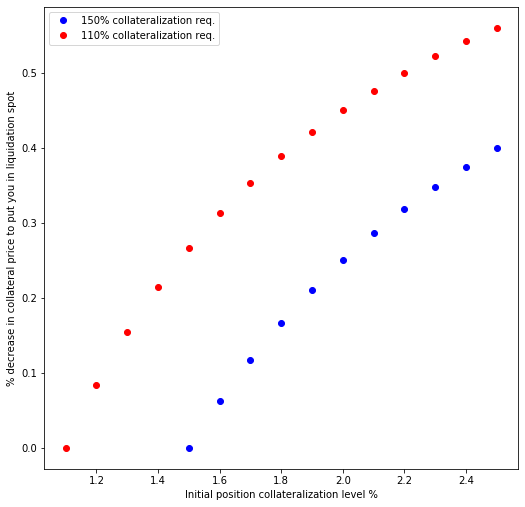

In [24]:
eth_o = 3500
#at a 150% collateralization ratio (e.g DAI)

x_150 = list(np.linspace(1.5, 2.5, 11))
y_150 = find_C_liquidation_stables(x_150, eth_o, 1.5 )

plt.plot(x_150, y_150, 'bo', label='150% collateralization req.')

#at a 110% collateralization ratio (e.g LUSD)

x_110 = list(np.linspace(1.1, 2.5, 15))
y_110 = find_C_liquidation_stables(x_110, eth_o, 1.1 )

plt.plot(x_110, y_110, 'ro', label='110% collateralization req.')

plt.legend(loc='upper left')
plt.xlabel('Initial position collateralization level %')
plt.ylabel('% decrease in collateral price to put you in liquidation spot')
plt.show()

Ok, so the curves above shows us that, by initiating a position on the collateralization ratios on x axis, we should expect to have our position near liquidation when we see x% decrease in collateral price, represented on y axis. 

#### **What is the upside you are exposed to when collateralized in different levels?**

Assuming there are no fees neither interest rates to get leverage (just for the example sake.. there is no free luch). Also:

* We are minting stable coins to go long on ETH, very simple stuff.
* To get your collateral back, you just need to deposit the amount you minted in the first place.

If you set up a equation to find the **profit** of a leveraged position:

P = ((balance_after_leverage * (1+eth_increase)) - leverage_eth_amount) / eth_o - 1

which, if you open a little more in terms of initial balance, price increase, and leverage %, you will find that: 

P = (pi*(1+r)) / r

where pi = price increase, r = collateralization ration.

The derivate of P for pi would be: 

dP/dpi = (1+r)/r

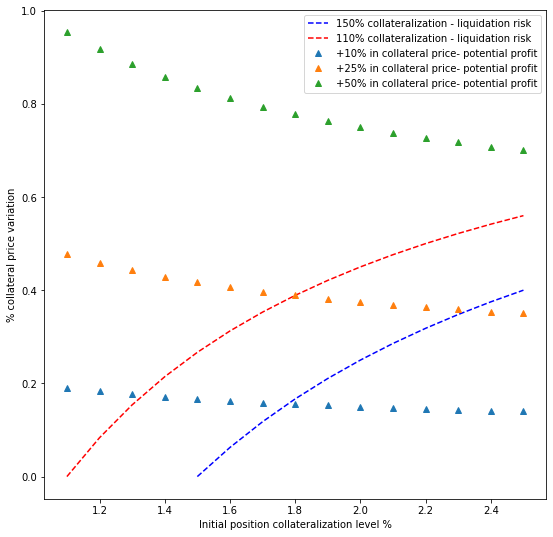

In [59]:
# liquidation risk
plt.plot(x_150, y_150, 'b--', label='150% collateralization - liquidation risk')
plt.plot(x_110, y_110, 'r--', label='110% collateralization - liquidation risk')

# leverage upside plotting
y_upside_leverage_p10 = [(.1*(1+r)/r) for r in x_110]
y_upside_leverage_p25 = [(.25*(1+r)/r) for r in x_110]
y_upside_leverage_p50 = [(.5*(1+r)/r) for r in x_110]

plt.plot(x_110, y_upside_leverage_p10,  '^', label= '+10% in collateral price- potential profit')
plt.plot(x_110, y_upside_leverage_p25, '^', label= '+25% in collateral price- potential profit')
plt.plot(x_110, y_upside_leverage_p50, '^', label= '+50% in collateral price- potential profit')

plt.legend(loc='upper right')
plt.xlabel('Initial position collateralization level %')
plt.ylabel('% collateral price variation')
plt.show()

In [52]:
x_110

[1.1,
 1.2000000000000002,
 1.3,
 1.4000000000000001,
 1.5,
 1.6,
 1.7000000000000002,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5]

In [39]:
leverage_eth_amount = eth_o / 1.5
balance_after_leverage = eth_o + leverage_eth_amount

eth_increase = .5

profit_lev = ((balance_after_leverage * (1+eth_increase)) - leverage_eth_amount) / eth_o - 1
profit_lev


0.8333333333333333